# Speech Emotion Recognition using the RAVDESS AND TESS dataset

For this task, I have used 5252 samples from

the Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS) dataset
the Toronto emotional speech set (TESS) dataset
The samples include:

**1440 **speech files and **1012** Song files from **RAVDESS**. This dataset includes recordings of 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech includes calm, happy, sad, angry, fearful, surprise, and disgust expressions, and song contains calm, happy, sad, angry, and fearful emotions. Each file was rated 10 times on emotional validity, intensity, and genuineness. Ratings were provided by 247 individuals who were characteristic of untrained adult research participants from North America. A further set of 72 participants provided test-retest data. High levels of emotional validity, interrater reliability, and test-retest intrarater reliability were reported. Validation data is open-access, and can be downloaded along with our paper from PLoS ONE.

**2800** files from **TESS**. A set of 200 target words were spoken in the carrier phrase "Say the word _____' by two actresses (aged 26 and 64 years) and recordings were made of the set portraying each of seven emotions (anger, disgust, fear, happiness, pleasant surprise, sadness, and neutral). There are 2800 stimuli in total. Two actresses were recruited from the Toronto area. Both actresses speak English as their first language, are university educated, and have musical training. Audiometric testing indicated that both actresses have thresholds within the normal range.

Mounting Drive so that we can access the contents directly from the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Librosa library(A python package) for extracting important features of the audio like the pitch,tone.

Loading one audio file from the drive using librosa.
Librosa loads the audio file as a floating point time series.

In [ ]:
import librosa
from librosa import display

data, sampling_rate = librosa.load('/content/drive/MyDrive/RAVDESS/Speech/Actor_01/03-01-01-01-01-01-01.wav')

Plotting the audio file which was just loaded by librosa using waveplot function of librosa.This Function Plots the amplitude envelope of a waveform.

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


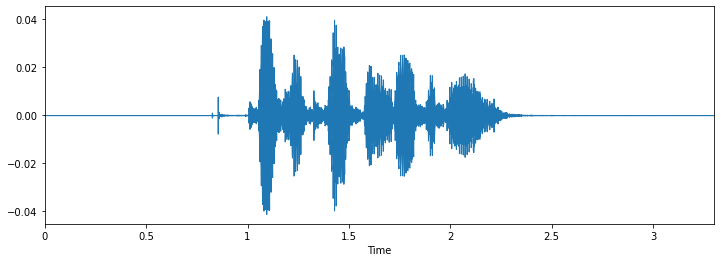

In [ ]:
% pylab inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

# Load all files


In [ ]:
# Loading saved models
import joblib
X = joblib.load('/content/drive/MyDrive/project/DL/joblib_files_for_DL_model/X_original_noise_pitch_speed_time_mfcc_40.joblib')
y = joblib.load('/content/drive/MyDrive/project/DL/joblib_files_for_DL_model/y_original_noise_pitch_speed_time_mfcc_40.joblib')

In [ ]:
y.shape

(15331,)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [ ]:
import numpy as np
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [ ]:
x_traincnn.shape, x_testcnn.shape

((10271, 40, 1), (5060, 40, 1))

# Neural network

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(64, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))

model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
# in the previous line it will be 4 for mfcc 40,26 and 3 for mfcc 13.

model.add(Conv1D(256, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
#opt = tf.keras.optimizers.RMSprop(learning_rate=0.00005, rho=0.9, epsilon=1e-07, decay=0.0)
opt = tf.keras.optimizers.SGD(learning_rate=0.00005, momentum=0.0, nesterov=False, name="SGD")
#opt = tf.keras.optimizers.Adam(learning_rate=0.0005,epsilon=1e-07)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 64)            384       
                                                                 
 activation (Activation)     (None, 40, 64)            0         
                                                                 
 dropout (Dropout)           (None, 40, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 128)           41088     
                                                                 
 activation_1 (Activation)   (None, 10, 128)           0         
                                                        

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=200, validation_data=(x_testcnn, y_test))

Epoch 1/200
642/642 [==============================] - 19s 8ms/step - loss: 3.1754 - accuracy: 0.2253 - val_loss: 1.5278 - val_accuracy: 0.3992
Epoch 2/200
642/642 [==============================] - 5s 8ms/step - loss: 2.0796 - accuracy: 0.2823 - val_loss: 1.4213 - val_accuracy: 0.4644
Epoch 3/200
642/642 [==============================] - 5s 8ms/step - loss: 1.7875 - accuracy: 0.3321 - val_loss: 1.3896 - val_accuracy: 0.4731
Epoch 4/200
642/642 [==============================] - 5s 8ms/step - loss: 1.6549 - accuracy: 0.3567 - val_loss: 1.3558 - val_accuracy: 0.5285
Epoch 5/200
642/642 [==============================] - 5s 7ms/step - loss: 1.5776 - accuracy: 0.3811 - val_loss: 1.3138 - val_accuracy: 0.5302
Epoch 6/200
642/642 [==============================] - 5s 7ms/step - loss: 1.5233 - accuracy: 0.4026 - val_loss: 1.2935 - val_accuracy: 0.5338
Epoch 7/200
642/642 [==============================] - 5s 8ms/step - loss: 1.4753 - accuracy: 0.4161 - val_loss: 1.2829 - val_accuracy: 0.530

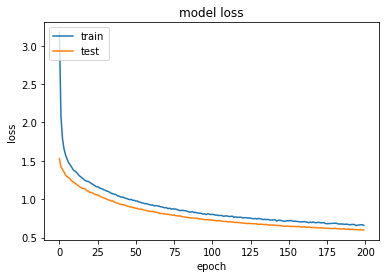

In [ ]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

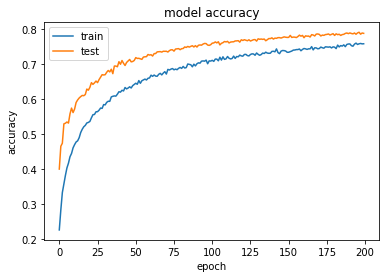

In [ ]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
predictions = model.predict(x_testcnn)
predictions= np.argmax(predictions,axis=1)


In [ ]:
predictions

array([5, 5, 5, ..., 7, 3, 5])

In [ ]:
y_test

array([5, 5, 5, ..., 7, 0, 5])

In [ ]:
new_Ytest = y_test.astype(int)

In [ ]:
new_Ytest

array([5, 5, 5, ..., 7, 0, 5])

              precision    recall  f1-score   support

           0       0.88      0.66      0.75       175
           1       0.71      0.72      0.72       625
           2       0.84      0.77      0.81      1281
           3       0.53      0.75      0.62       281
           4       0.76      0.68      0.72       247
           5       0.84      0.81      0.83      1284
           6       0.84      0.87      0.86       962
           7       0.64      0.82      0.72       205

    accuracy                           0.79      5060
   macro avg       0.76      0.76      0.75      5060
weighted avg       0.80      0.79      0.79      5060

----accuracy score 78.71541501976284 ----


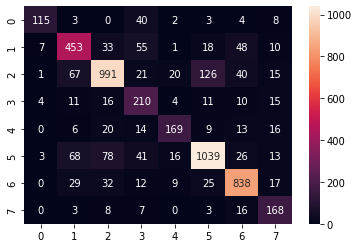

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn
import pandas as pd


print(classification_report(y_test, predictions))

acc = float(accuracy_score(y_test, predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test, predictions)
df_cm = pd.DataFrame(cm)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(new_Ytest, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.66      0.75       175
           1       0.71      0.72      0.72       625
           2       0.84      0.77      0.81      1281
           3       0.53      0.75      0.62       281
           4       0.76      0.68      0.72       247
           5       0.84      0.81      0.83      1284
           6       0.84      0.87      0.86       962
           7       0.64      0.82      0.72       205

    accuracy                           0.79      5060
   macro avg       0.76      0.76      0.75      5060
weighted avg       0.80      0.79      0.79      5060



In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(new_Ytest, predictions)
print (matrix)

# 0 = neutral, 1 = calm, 2 = happy, 3 = sad, 4 = angry, 5 = fearful, 6 = disgust, 7 = surprised

[[ 115    3    0   40    2    3    4    8]
 [   7  453   33   55    1   18   48   10]
 [   1   67  991   21   20  126   40   15]
 [   4   11   16  210    4   11   10   15]
 [   0    6   20   14  169    9   13   16]
 [   3   68   78   41   16 1039   26   13]
 [   0   29   32   12    9   25  838   17]
 [   0    3    8    7    0    3   16  168]]


In [ ]:
model.save('/content/drive/MyDrive/project/DL/dl_model.h5')
print("MODEL SAVED")

MODEL SAVED


In [ ]:
new_model=keras.models.load_model('/content/drive/MyDrive/project/DL/dl_model.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 64)            384       
                                                                 
 activation (Activation)     (None, 40, 64)            0         
                                                                 
 dropout (Dropout)           (None, 40, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 128)           41088     
                                                                 
 activation_1 (Activation)   (None, 10, 128)           0         
                                                        

In [ ]:
loss, acc = new_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

159/159 [==============================] - 1s 4ms/step - loss: 0.6002 - accuracy: 0.7872
Restored model, accuracy: 78.72%
